<span style='color:gray'> <span style="font-size:30px;"> 
**Selection of Data for "Predictive model (ML)"**

<span style='color:gray'> <span style="font-size:20px;"> 
**Importing Libraries, Regressors, and Required Dependencies**

In [1]:
"""%pip install --quiet --upgrade scikit-learn==1.2.2
%pip install --quiet qbstyles"""

# Importing the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.patches as mpatches  # To create a legend with a color box

import os  # Import the os module to work with file paths

from qbstyles import mpl_style
mpl_style(dark=False)  # Set light matplotlib style


# Regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error

<span style='color:gray'> <span style="font-size:20px;"> 
**Loading datafile that has been extracted from DLIS file after (Sorting, Cleaning, preprocessing, choosing the logs based on need logically ...)**

<span style='color:gray'> <span style="font-size:15px;"> 
**3-BRSA-944A-RJS**

In [2]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_944_ML.csv'
df_944_ML =  pd.read_csv(file_path)
df_944_ML.rename(columns={'CMFF': 'NMRFF', 'CMRP_3MS': 'NMREFF', 'TCMR': 'NMRTOT'}, inplace=True)
df_944_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5488.6860,18.344227,229.749070,73.139640,152.231600,2.493285,0.181833,67.179180,6.066652,0.109875,0.143338,0.143341
1,5488.8384,15.589806,183.014630,83.015100,96.225930,2.427294,0.209300,66.437190,5.704009,0.138243,0.169972,0.169975
2,5488.9907,15.148575,128.323290,60.429356,64.343010,2.410696,0.214533,65.967220,5.369229,0.134214,0.163915,0.165086
3,5489.1430,14.718891,76.603134,43.963387,34.749203,2.413879,0.210541,64.888306,5.229071,0.117416,0.150267,0.155419
4,5489.2954,14.587625,72.992805,45.506030,34.080303,2.422581,0.214654,64.874230,5.184336,0.097082,0.134775,0.139856
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,5712.1045,30.955545,1311.391800,651.956540,592.902040,2.352752,0.256507,72.072840,4.897001,0.069591,0.083593,0.089989
1467,5712.2570,33.162453,1537.605800,1297.797200,801.185900,2.372212,0.229790,72.228806,4.720091,0.069591,0.083593,0.089989
1468,5712.4090,35.284595,1440.649000,1020.680850,797.381100,2.433463,0.158586,70.845290,4.315377,0.069591,0.083593,0.089989
1469,5712.5615,40.532110,638.586800,479.651250,444.811770,2.516208,0.076930,64.455025,3.854675,0.069591,0.083593,0.089989


=======================

<span style='color:gray'> <span style="font-size:15px;"> 
**1-BRSA-1116-RJS**

In [3]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_1116_ML.csv'
df_1116_ML =  pd.read_csv(file_path)
df_1116_ML.rename(columns={'CMFF': 'NMRFF', 'CMRP_3MS': 'NMREFF', 'TCMR': 'NMRTOT'}, inplace=True)
df_1116_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5358.9937,43.958700,76.10261,37.830450,16.687830,2.491682,0.197165,66.492004,5.102749,0.119948,0.154198,0.154217
1,5359.1460,50.214672,44.97399,16.877588,9.727284,2.503132,0.194263,64.525550,5.110857,0.108406,0.144810,0.144813
2,5359.2983,51.442577,97.68016,17.893017,9.559625,2.511300,0.184646,64.186310,5.136480,0.108406,0.144810,0.144813
3,5359.4507,49.099472,123.43374,22.349895,11.119614,2.522695,0.157939,64.227920,5.168157,0.098564,0.134407,0.134411
4,5359.6030,48.586650,177.40233,32.093760,15.711706,2.512599,0.141793,64.376940,5.210169,0.090104,0.127551,0.128026
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,5560.0093,25.194620,370.84415,443.657200,284.257540,2.410358,0.167036,73.990560,5.168014,0.165618,0.170487,0.177539
1312,5560.1616,21.646051,565.26465,1050.263500,454.497960,2.414290,0.162737,74.333560,5.183177,0.144250,0.157453,0.157456
1313,5560.3140,18.730562,753.39410,1674.343100,814.052250,2.414290,0.154881,74.137340,5.183177,0.144250,0.157453,0.157456
1314,5560.4663,17.236074,638.75640,1950.000000,1443.658900,2.414290,0.141860,73.096650,5.183177,0.144250,0.157453,0.157456


=======================

<span style='color:gray'> <span style="font-size:15px;"> 
**9-lTP-1-RJS**

In [4]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_9_ITP_ML.csv'
df_9_ITP_ML =  pd.read_csv(file_path)
df_9_ITP_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5230.899893,18.364668,19.196234,20.528210,22.001585,2.112285,0.277651,68.337450,8.430419,0.146941,0.206191,0.279142
1,5230.999893,18.145609,17.247047,17.625770,18.691048,2.125317,0.281514,67.993440,8.418438,0.142935,0.207419,0.269785
2,5231.099893,17.943176,15.329754,15.300582,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
3,5231.199893,18.042002,11.579553,11.556740,11.997000,2.124417,0.312481,67.298560,8.239479,0.131576,0.215271,0.257083
4,5231.299893,18.240273,10.135851,10.116982,10.471834,2.124772,0.306717,66.678116,8.161089,0.124349,0.220581,0.251031
...,...,...,...,...,...,...,...,...,...,...,...,...
3591,5589.999899,60.493317,1778.057100,1787.317900,1793.273800,2.549341,0.114878,53.896230,6.085524,0.021548,0.044737,0.047193
3592,5590.099899,62.248062,1779.707400,1789.183700,1795.288100,2.535191,0.112063,53.616760,6.189338,0.021446,0.042745,0.043601
3593,5590.199899,64.159600,1779.757400,1789.283100,1795.457600,2.500213,0.107529,53.366962,6.364588,0.020265,0.041515,0.041670
3594,5590.299899,67.805580,1779.227800,1788.753200,1794.995500,2.460282,0.106075,53.032112,6.533904,0.017628,0.041529,0.041578


=======================

<span style='color:gray'> <span style="font-size:15px;"> 
**3-BRSA-1215-RJS**

In [5]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_1215_ML.csv'
df_1215_ML =  pd.read_csv(file_path)
df_1215_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5417.6676,21.410461,18.331234,16.144780,15.038757,2.621732,0.122260,62.967560,4.949074,0.008995,0.030131,0.050489
1,5417.7438,21.198140,15.944619,14.455164,13.604523,2.622316,0.121804,62.562557,4.973447,0.008995,0.030131,0.050489
2,5417.8200,20.987156,14.288423,13.194154,12.510310,2.623430,0.121129,62.562557,4.992749,0.012004,0.037343,0.054942
3,5417.8962,20.760265,13.320366,12.416869,11.831970,2.624798,0.120561,62.226500,5.012835,0.012004,0.037343,0.054942
4,5417.9724,20.520035,12.952274,12.090529,11.554049,2.625881,0.120365,62.226500,5.021335,0.012773,0.026898,0.047561
...,...,...,...,...,...,...,...,...,...,...,...,...
3056,5650.5348,50.979370,2.910943,2.573161,2.557892,2.567846,0.221071,67.835724,4.236481,0.007976,0.015516,0.055404
3057,5650.6110,52.180763,2.910943,2.573161,2.557892,2.565697,0.221071,67.835724,4.231709,0.007976,0.015516,0.055404
3058,5650.6872,53.384766,2.910943,2.573161,2.557892,2.558831,0.221071,69.624330,4.249410,0.007976,0.015516,0.055404
3059,5650.7634,54.232105,2.910943,2.573161,2.557892,2.558831,0.221071,69.624330,4.249410,0.007976,0.015516,0.055404


=======================

<span style='color:gray'> <span style="font-size:15px;"> 
**3-EQNR-1-SPS**

In [6]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_3_EQNR_1_ML.csv'
df_3_EQNR_1_ML =  pd.read_csv(file_path)
df_3_EQNR_1_ML.rename(columns={'CMFF': 'NMRFF', 'CMRP_3MS': 'NMREFF', 'TCMR': 'NMRTOT'}, inplace=True)
df_3_EQNR_1_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5910.3770,10.116627,17.348742,13.610845,11.012374,2.457128,0.314454,57.695312,9.283119,0.045885,0.076848,0.083712
1,5910.5293,9.561498,17.348742,13.610845,11.012374,2.457128,0.314454,57.695312,9.283119,0.045885,0.076848,0.083712
2,5910.6816,8.845626,16.882212,13.971661,11.522593,2.605783,0.246314,57.695312,8.533769,0.045885,0.076848,0.083712
3,5910.8340,8.898959,12.475799,10.178597,9.018561,2.689210,0.131299,57.695312,7.510061,0.045885,0.076848,0.083712
4,5910.9863,7.925787,9.462109,8.122060,7.696966,2.645017,0.096377,57.695312,7.121358,0.045885,0.076848,0.083712
...,...,...,...,...,...,...,...,...,...,...,...,...
851,6040.0693,92.408390,3.659379,3.378879,2.910452,2.417150,0.237977,57.763680,4.993137,0.028233,0.039504,0.110826
852,6040.2217,90.672670,3.920553,3.626086,2.970756,2.459412,0.221882,57.470703,5.047293,0.043375,0.051421,0.123485
853,6040.3740,89.582150,4.263884,3.857392,3.076652,2.478745,0.214787,57.138670,5.106287,0.065226,0.075255,0.160100
854,6040.5264,89.035130,4.133290,3.782485,2.996580,2.453471,0.192698,57.646484,5.158799,0.078408,0.093187,0.186624


=======================

<span style='color:gray'> <span style="font-size:15px;"> 
**3-EQNR-3-SPS**

In [7]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_3_EQNR_3_ML.csv'
df_3_EQNR_3_ML =  pd.read_csv(file_path)
df_3_EQNR_3_ML.rename(columns={'CMFF': 'NMRFF', 'CMRP_3MS': 'NMREFF', 'TCMR': 'NMRTOT'}, inplace=True)
df_3_EQNR_3_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,6050.5850,27.374037,48.122364,60.310467,50.990690,2.300290,0.145956,63.627644,0.111779,0.086092,0.102979,0.127333
1,6050.7373,21.987434,36.773373,42.810596,39.602875,2.293669,0.125276,64.685270,0.109289,0.086092,0.102979,0.127333
2,6050.8896,28.754340,35.816006,40.594143,39.440018,2.217990,0.105426,65.211360,0.102368,0.082011,0.094244,0.116715
3,6051.0420,19.819307,39.945420,42.977238,45.657734,2.166148,0.087997,64.303696,0.100000,0.072717,0.085080,0.099674
4,6051.1943,38.248215,49.754284,59.098600,67.893845,2.218606,0.067857,63.410706,0.100000,0.058794,0.075213,0.075213
...,...,...,...,...,...,...,...,...,...,...,...,...
1730,6314.6940,51.415714,2.653257,2.131811,1.854116,2.507010,0.141281,64.556470,4.203460,0.094473,0.130534,0.151384
1731,6314.8467,55.503613,3.084166,2.306518,1.995265,2.487556,0.148064,63.817300,3.959332,0.084641,0.120594,0.134910
1732,6314.9990,55.075043,3.702130,2.748514,2.388380,2.476734,0.147399,63.830630,3.758424,0.075792,0.114405,0.117376
1733,6315.1514,52.195040,4.674475,3.237480,2.880047,2.480292,0.148540,63.218487,3.776830,0.075792,0.114405,0.117376


# ========================================================

## Seaborn PairPlot

A Seaborn pairplot is a multivariate visualization that shows the pairwise relationships between all numeric variables in a dataset. It is a grid of plots, with each row and column representing a different variable. The diagonal plots show the distribution of each variable, while the off-diagonal plots show the relationship between two variables.

The Seaborn pairplot can be used to explore the relationships between variables, identify outliers, and visualize the distribution of data. It is a powerful tool for data exploration and can be used to gain insights into complex datasets.

<span style='color:gray'> <span style="font-size:15px;"> 
**3-BRSA-944A-RJS**

In [8]:
# Set style
sns.set_style('white')  # Set the style to white background

# Set palette
custom_palette = sns.color_palette(["cyan"])  # Set the custom color palette

# Selecting columns for the pairplot while excluding 'DEPTH', 'AT10', and 'AT30'
#columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']
columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRTOT']

# Creating a pairplot with selected columns and custom colors for scatterplots and histograms
pair_plot = sns.pairplot(df_944_ML[columns_to_include], kind='reg', diag_kind='kde', palette=custom_palette,
                         plot_kws={'color': 'teal', 'scatter_kws': {'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                                   'line_kws': {'color': 'blue'}},
                         diag_kws={'color': 'blue', 'alpha': 0.5})  # Adjust the color of histograms here

# Customizing the axes colors
plt.rcParams['axes.edgecolor'] = 'black'  # Set the color of the axes
plt.rcParams['axes.labelcolor'] = 'black'  # Set the color of axis labels

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the pairplot as an image (e.g., PNG)
output_filename = os.path.join(output_folder, 'pairplot-seaborn[3-BRSA-944A-RJS].png')  # Full path to the output file
pair_plot.savefig(output_filename)

plt.close(pair_plot.fig)


In [9]:
correlation_matrix = df_944_ML.corr()
correlation_matrix

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
DEPTH,1.000000,0.154985,-0.036401,-0.107376,-0.148059,-0.205996,0.192922,0.191578,0.246798,0.220800,0.119829,0.110084
GR,0.154985,1.000000,-0.439966,-0.436373,-0.396066,0.311614,-0.253912,-0.256753,-0.050145,-0.346434,-0.319919,-0.319748
AT10,-0.036401,-0.439966,1.000000,0.823150,0.748090,-0.285943,0.167521,0.241724,0.112116,0.320784,0.269592,0.271214
AT30,-0.107376,-0.436373,0.823150,1.000000,0.944425,-0.279728,0.167430,0.264139,0.079704,0.318894,0.279044,0.273599
AT90,-0.148059,-0.396066,0.748090,0.944425,1.000000,-0.237441,0.132205,0.224106,0.063133,0.267584,0.239154,0.229151
RHOZ,-0.205996,0.311614,-0.285943,-0.279728,-0.237441,1.000000,-0.899999,-0.902183,-0.372422,-0.847784,-0.853245,-0.840735
NPHI,0.192922,-0.253912,0.167521,0.167430,0.132205,-0.899999,1.000000,0.899026,0.435707,0.774320,0.799260,0.798456
DTCO,0.191578,-0.256753,0.241724,0.264139,0.224106,-0.902183,0.899026,1.000000,0.454867,0.751007,0.774393,0.768022
PEFZ,0.246798,-0.050145,0.112116,0.079704,0.063133,-0.372422,0.435707,0.454867,1.000000,0.381518,0.396392,0.406016
NMRFF,0.220800,-0.346434,0.320784,0.318894,0.267584,-0.847784,0.774320,0.751007,0.381518,1.000000,0.962406,0.944992


<span style='color:gray'> <span style="font-size:15px;"> 
**===============================================================**

<span style='color:gray'> <span style="font-size:15px;"> 
**1-BRSA-1116-RJS**

In [10]:
sns.set_style('white')  # Set the style to white background

# Set palette
custom_palette = sns.color_palette(["cyan"])  # Set the custom color palette

# Selecting columns for the pairplot while excluding 'DEPTH', 'AT10', and 'AT30'
#columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']
columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRTOT']

# Creating a pairplot with selected columns and custom colors for scatterplots and histograms
pair_plot = sns.pairplot(df_1116_ML[columns_to_include], kind='reg', diag_kind='kde', palette=custom_palette,
                         plot_kws={'color': 'teal', 'scatter_kws': {'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                                   'line_kws': {'color': 'blue'}},
                         diag_kws={'color': 'blue', 'alpha': 0.5})  # Adjust the color of histograms here

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the pairplot as an image (e.g., PNG)
output_filename = os.path.join(output_folder, 'pairplot-seaborn[1-BRSA-1116-RJS].png')  # Full path to the output file
pair_plot.savefig(output_filename)

plt.close(pair_plot.fig)

In [11]:
correlation_matrix = df_1116_ML.corr()
correlation_matrix

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
DEPTH,1.000000,0.409343,-0.541296,0.448482,0.489039,0.179920,-0.375991,-0.123018,-0.122222,-0.152047,-0.168529,-0.052887
GR,0.409343,1.000000,-0.551078,0.437839,0.270275,-0.049105,-0.217349,0.099755,-0.112590,0.097102,0.045812,0.039009
AT10,-0.541296,-0.551078,1.000000,-0.139466,0.007679,-0.122610,0.280996,-0.008903,0.322464,0.082173,0.066148,0.039603
AT30,0.448482,0.437839,-0.139466,1.000000,0.689216,-0.033208,-0.396014,-0.044691,0.082308,0.029777,-0.069152,-0.024854
AT90,0.489039,0.270275,0.007679,0.689216,1.000000,0.023195,-0.282267,-0.061227,0.072121,-0.040064,-0.157231,-0.090217
RHOZ,0.179920,-0.049105,-0.122610,-0.033208,0.023195,1.000000,-0.382414,-0.469575,-0.414786,-0.379561,-0.550278,-0.528884
NPHI,-0.375991,-0.217349,0.280996,-0.396014,-0.282267,-0.382414,1.000000,0.358015,0.103775,0.418305,0.370711,0.327926
DTCO,-0.123018,0.099755,-0.008903,-0.044691,-0.061227,-0.469575,0.358015,1.000000,0.172259,0.435723,0.441213,0.411061
PEFZ,-0.122222,-0.112590,0.322464,0.082308,0.072121,-0.414786,0.103775,0.172259,1.000000,-0.089071,0.378546,0.389106
NMRFF,-0.152047,0.097102,0.082173,0.029777,-0.040064,-0.379561,0.418305,0.435723,-0.089071,1.000000,0.425690,0.411736


<span style='color:gray'> <span style="font-size:15px;"> 
**===============================================================**

<span style='color:gray'> <span style="font-size:15px;"> 
**9-lTP-1-RJS**

In [12]:
sns.set_style('white')  # Set the style to white background

# Set palette
custom_palette = sns.color_palette(["cyan"])  # Set the custom color palette

# Selecting columns for the pairplot while excluding 'DEPTH', 'AT10', and 'AT30'
#columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']
columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRTOT']

# Creating a pairplot with selected columns and custom colors for scatterplots and histograms
pair_plot = sns.pairplot(df_9_ITP_ML[columns_to_include], kind='reg', diag_kind='kde', palette=custom_palette,
                         plot_kws={'color': 'teal', 'scatter_kws': {'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                                   'line_kws': {'color': 'blue'}},
                         diag_kws={'color': 'blue', 'alpha': 0.5})  # Adjust the color of histograms here


# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the pairplot as an image (e.g., PNG)
output_filename = os.path.join(output_folder, 'pairplot-seaborn[9-lTP-1-RJS].png')  # Full path to the output file
pair_plot.savefig(output_filename)

plt.close(pair_plot.fig)

In [13]:
correlation_matrix = df_9_ITP_ML.corr()
correlation_matrix

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
DEPTH,1.000000,0.618172,0.537482,0.518797,0.492691,0.207952,-0.415465,-0.422993,-0.079033,-0.224336,-0.298476,-0.315266
GR,0.618172,1.000000,0.137183,0.132133,0.113531,0.149725,-0.226661,-0.369865,-0.075844,-0.266233,-0.269817,-0.276196
AT10,0.537482,0.137183,1.000000,0.993679,0.968881,0.123432,-0.373421,-0.239825,0.002882,-0.046779,-0.185261,-0.206117
AT30,0.518797,0.132133,0.993679,1.000000,0.987510,0.122458,-0.360260,-0.250669,0.005179,-0.039486,-0.173698,-0.193482
AT90,0.492691,0.113531,0.968881,0.987510,1.000000,0.120708,-0.332686,-0.248246,-0.014554,-0.006249,-0.141739,-0.162430
RHOZ,0.207952,0.149725,0.123432,0.122458,0.120708,1.000000,-0.827276,-0.549420,-0.341680,-0.394256,-0.680437,-0.688101
NPHI,-0.415465,-0.226661,-0.373421,-0.360260,-0.332686,-0.827276,1.000000,0.626336,0.331665,0.452755,0.725738,0.737918
DTCO,-0.422993,-0.369865,-0.239825,-0.250669,-0.248246,-0.549420,0.626336,1.000000,0.059739,0.569373,0.657198,0.640890
PEFZ,-0.079033,-0.075844,0.002882,0.005179,-0.014554,-0.341680,0.331665,0.059739,1.000000,-0.227209,0.071810,0.112225
NMRFF,-0.224336,-0.266233,-0.046779,-0.039486,-0.006249,-0.394256,0.452755,0.569373,-0.227209,1.000000,0.785858,0.751298


<span style='color:gray'> <span style="font-size:15px;"> 
**===============================================================**

<span style='color:gray'> <span style="font-size:15px;"> 
**3-BRSA-1215-RJS**

In [14]:
sns.set_style('white')  # Set the style to white background

# Set palette
custom_palette = sns.color_palette(["cyan"])  # Set the custom color palette

# Selecting columns for the pairplot while excluding 'DEPTH', 'AT10', and 'AT30'
#columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']
columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRTOT']

# Creating a pairplot with selected columns and custom colors for scatterplots and histograms
pair_plot = sns.pairplot(df_1215_ML[columns_to_include], kind='reg', diag_kind='kde', palette=custom_palette,
                         plot_kws={'color': 'teal', 'scatter_kws': {'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                                   'line_kws': {'color': 'blue'}},
                         diag_kws={'color': 'blue', 'alpha': 0.5})  # Adjust the color of histograms here


# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the pairplot as an image (e.g., PNG)
output_filename = os.path.join(output_folder, 'pairplot-seaborn[3-BRSA-1215-RJS].png')  # Full path to the output file
pair_plot.savefig(output_filename)

plt.close(pair_plot.fig)

In [15]:
correlation_matrix = df_1215_ML.corr()
correlation_matrix

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
DEPTH,1.000000,0.710052,-0.343120,-0.345864,-0.348276,0.192632,-0.187276,0.133679,-0.097566,-0.426890,-0.514555,-0.411873
GR,0.710052,1.000000,-0.363303,-0.363850,-0.365094,0.168740,0.060513,0.406067,-0.071883,-0.413883,-0.487814,-0.412134
AT10,-0.343120,-0.363303,1.000000,0.998964,0.995582,-0.693609,0.402538,0.121030,0.115268,0.640056,0.606848,0.560465
AT30,-0.345864,-0.363850,0.998964,1.000000,0.998118,-0.699300,0.411576,0.129419,0.122037,0.643150,0.609939,0.564158
AT90,-0.348276,-0.365094,0.995582,0.998118,1.000000,-0.703554,0.416194,0.129583,0.120546,0.649754,0.616029,0.570080
RHOZ,0.192632,0.168740,-0.693609,-0.699300,-0.703554,1.000000,-0.725389,-0.480550,-0.067744,-0.519503,-0.492122,-0.474881
NPHI,-0.187276,0.060513,0.402538,0.411576,0.416194,-0.725389,1.000000,0.793692,0.247355,0.250955,0.220922,0.221154
DTCO,0.133679,0.406067,0.121030,0.129419,0.129583,-0.480550,0.793692,1.000000,0.152557,-0.046514,-0.081889,-0.037842
PEFZ,-0.097566,-0.071883,0.115268,0.122037,0.120546,-0.067744,0.247355,0.152557,1.000000,-0.020821,-0.048958,-0.062484
NMRFF,-0.426890,-0.413883,0.640056,0.643150,0.649754,-0.519503,0.250955,-0.046514,-0.020821,1.000000,0.947881,0.902166


<span style='color:gray'> <span style="font-size:15px;"> 
**===============================================================**

<span style='color:gray'> <span style="font-size:15px;"> 
**3-EQNR-1-SPS**

In [16]:
sns.set_style('white')  # Set the style to white background

# Set palette
custom_palette = sns.color_palette(["cyan"])  # Set the custom color palette

# Selecting columns for the pairplot while excluding 'DEPTH', 'AT10', and 'AT30'
#columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']
columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRTOT']

# Creating a pairplot with selected columns and custom colors for scatterplots and histograms
pair_plot = sns.pairplot(df_3_EQNR_1_ML[columns_to_include], kind='reg', diag_kind='kde', palette=custom_palette,
                         plot_kws={'color': 'teal', 'scatter_kws': {'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                                   'line_kws': {'color': 'blue'}},
                         diag_kws={'color': 'blue', 'alpha': 0.5})  # Adjust the color of histograms here

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the pairplot as an image (e.g., PNG)
output_filename = os.path.join(output_folder, 'pairplot-seaborn[3-EQNR-1-SPS].png')  # Full path to the output file
pair_plot.savefig(output_filename)

plt.close(pair_plot.fig)

In [17]:
correlation_matrix = df_3_EQNR_1_ML.corr()
correlation_matrix

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
DEPTH,1.000000,0.286200,0.001274,-0.033835,-0.049420,-0.276304,0.288980,0.075897,-0.272752,-0.444882,-0.572839,0.198529
GR,0.286200,1.000000,-0.073792,-0.073131,-0.085394,-0.218986,0.425806,-0.050556,-0.177094,-0.133559,-0.280905,0.612767
AT10,0.001274,-0.073792,1.000000,0.741563,0.723269,-0.289282,0.085554,0.029211,0.063118,0.129085,0.087193,0.023141
AT30,-0.033835,-0.073131,0.741563,1.000000,0.927829,-0.325879,0.132910,-0.003534,0.111896,0.096690,0.099176,-0.005779
AT90,-0.049420,-0.085394,0.723269,0.927829,1.000000,-0.337799,0.134351,-0.002854,0.107472,0.102672,0.109849,-0.015449
RHOZ,-0.276304,-0.218986,-0.289282,-0.325879,-0.337799,1.000000,-0.701786,-0.007617,-0.123326,-0.154275,-0.090006,-0.310084
NPHI,0.288980,0.425806,0.085554,0.132910,0.134351,-0.701786,1.000000,-0.069709,-0.020949,-0.094666,-0.141624,0.372505
DTCO,0.075897,-0.050556,0.029211,-0.003534,-0.002854,-0.007617,-0.069709,1.000000,0.000629,0.087510,0.013377,-0.045643
PEFZ,-0.272752,-0.177094,0.063118,0.111896,0.107472,-0.123326,-0.020949,0.000629,1.000000,0.194351,0.210730,-0.062368
NMRFF,-0.444882,-0.133559,0.129085,0.096690,0.102672,-0.154275,-0.094666,0.087510,0.194351,1.000000,0.943987,0.280359


<span style='color:gray'> <span style="font-size:15px;"> 
**===============================================================**

<span style='color:gray'> <span style="font-size:15px;"> 
**3-EQNR-3-SPS**

In [18]:
sns.set_style('white')  # Set the style to white background

# Set palette
custom_palette = sns.color_palette(["cyan"])  # Set the custom color palette

# Selecting columns for the pairplot while excluding 'DEPTH', 'AT10', and 'AT30'
#columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']
columns_to_include = ['GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRTOT']

# Creating a pairplot with selected columns and custom colors for scatterplots and histograms
pair_plot = sns.pairplot(df_3_EQNR_3_ML[columns_to_include], kind='reg', diag_kind='kde', palette=custom_palette,
                         plot_kws={'color': 'teal', 'scatter_kws': {'s': 30, 'alpha': 0.5, 'edgecolor': 'white'},
                                   'line_kws': {'color': 'blue'}},
                         diag_kws={'color': 'blue', 'alpha': 0.5})  # Adjust the color of histograms here


# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the pairplot as an image (e.g., PNG)
output_filename = os.path.join(output_folder, 'pairplot-seaborn[3-EQNR-3-SPS].png')  # Full path to the output file
pair_plot.savefig(output_filename)

plt.close(pair_plot.fig)

In [19]:
correlation_matrix = df_3_EQNR_3_ML.corr()
correlation_matrix

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
DEPTH,1.000000,0.337793,-0.387528,-0.578527,-0.473611,0.559867,0.302100,0.270326,0.825566,-0.007304,0.152447,0.164901
GR,0.337793,1.000000,0.065113,-0.118067,0.013410,0.153748,0.046042,0.012152,0.194731,0.171168,0.127296,0.137492
AT10,-0.387528,0.065113,1.000000,0.821677,0.663109,-0.351375,-0.070905,-0.000762,-0.303854,0.246326,0.144010,0.125430
AT30,-0.578527,-0.118067,0.821677,1.000000,0.732240,-0.465821,-0.173213,-0.115046,-0.504916,0.187246,0.041981,0.025035
AT90,-0.473611,0.013410,0.663109,0.732240,1.000000,-0.437705,-0.119564,-0.056532,-0.470438,0.199253,0.059486,0.043083
RHOZ,0.559867,0.153748,-0.351375,-0.465821,-0.437705,1.000000,-0.191908,-0.197125,0.614741,-0.468722,-0.369282,-0.342099
NPHI,0.302100,0.046042,-0.070905,-0.173213,-0.119564,-0.191908,1.000000,0.677243,0.359040,0.621343,0.739322,0.743609
DTCO,0.270326,0.012152,-0.000762,-0.115046,-0.056532,-0.197125,0.677243,1.000000,0.340117,0.538642,0.667881,0.666322
PEFZ,0.825566,0.194731,-0.303854,-0.504916,-0.470438,0.614741,0.359040,0.340117,1.000000,-0.007972,0.188170,0.203894
NMRFF,-0.007304,0.171168,0.246326,0.187246,0.199253,-0.468722,0.621343,0.538642,-0.007972,1.000000,0.884769,0.871982


<span style='color:gray'> <span style="font-size:25px;"> 
**===============================================================================**

<span style='color:blue'> <span style="font-size:20px;"> 
**Histograms for different well-logs to show the range of each log of different wells**

<span style='color:green'> <span style="font-size:15px;"> 
**Gamma Ray Log (GR)**

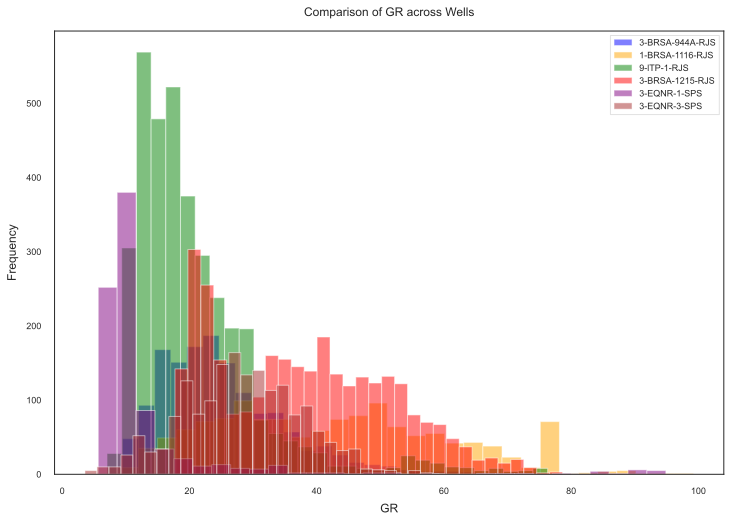

In [20]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['GR'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of GR across Wells')
plt.xlabel('GR')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-GR.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Resistivity in 90 inches (AT90)**

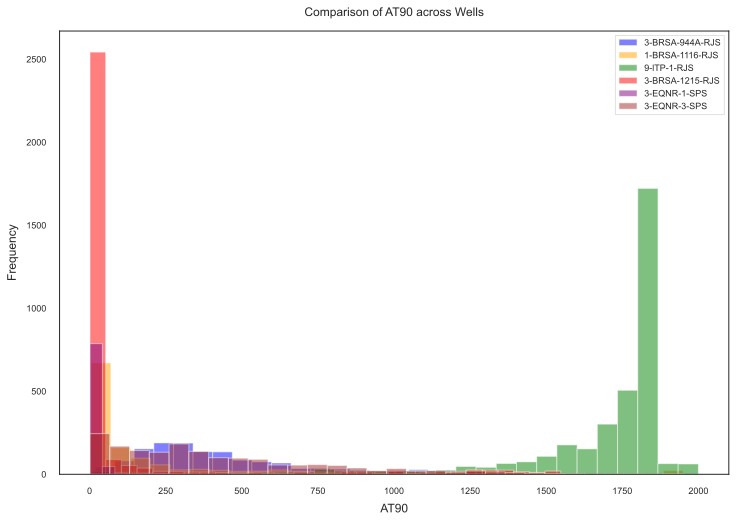

In [21]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['AT90'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of AT90 across Wells')
plt.xlabel('AT90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-AT90.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Density Log**

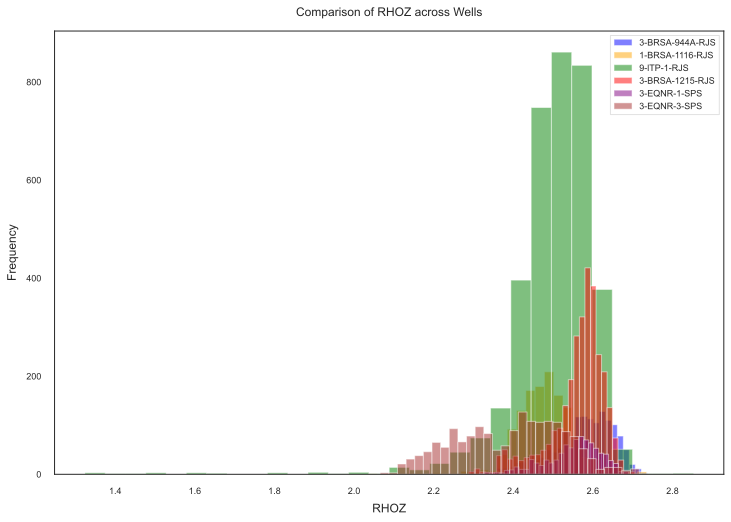

In [22]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['RHOZ'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of RHOZ across Wells')
plt.xlabel('RHOZ')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-RHOZ.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Neutron Porosity**

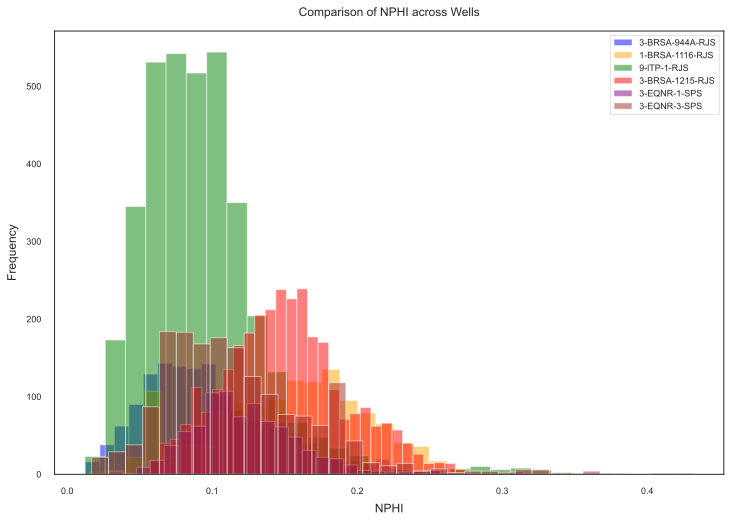

In [23]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['NPHI'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of NPHI across Wells')
plt.xlabel('NPHI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-NPHI.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Photo-electric Factor**

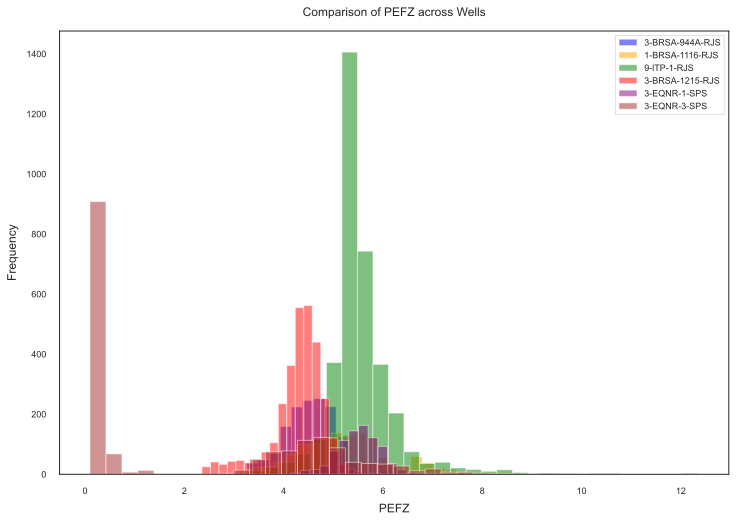

In [24]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['PEFZ'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of PEFZ across Wells')
plt.xlabel('PEFZ')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-PEFZ.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Compressional Slowness**

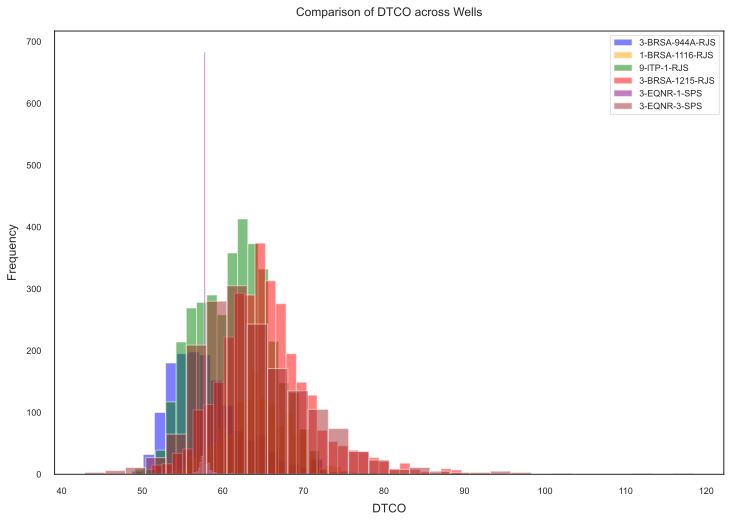

In [25]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['DTCO'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of DTCO across Wells')
plt.xlabel('DTCO')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-DTCO.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Free Fluid NMR**

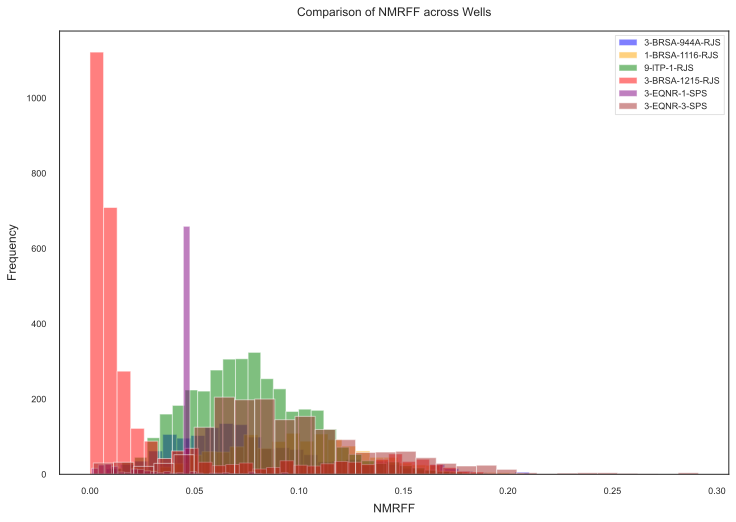

In [26]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['NMRFF'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of NMRFF across Wells')
plt.xlabel('NMRFF')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-NMRFF.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Effective NMR**

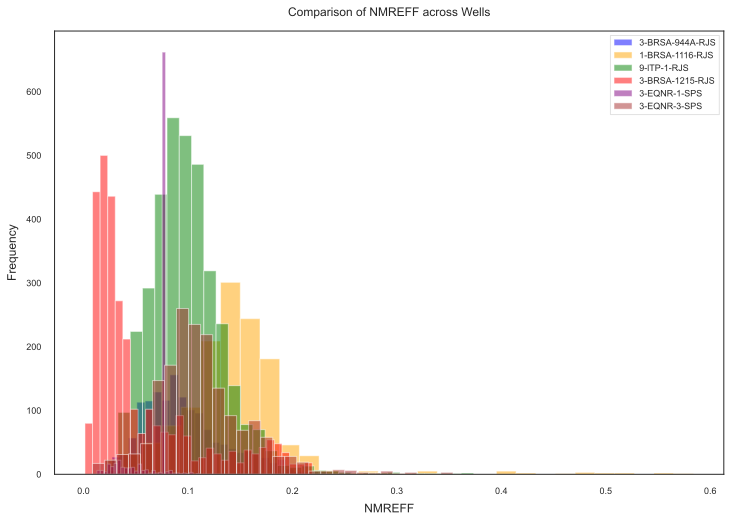

In [27]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['NMREFF'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of NMREFF across Wells')
plt.xlabel('NMREFF')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-NMREFF.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:green'> <span style="font-size:15px;"> 
**Total NMR**

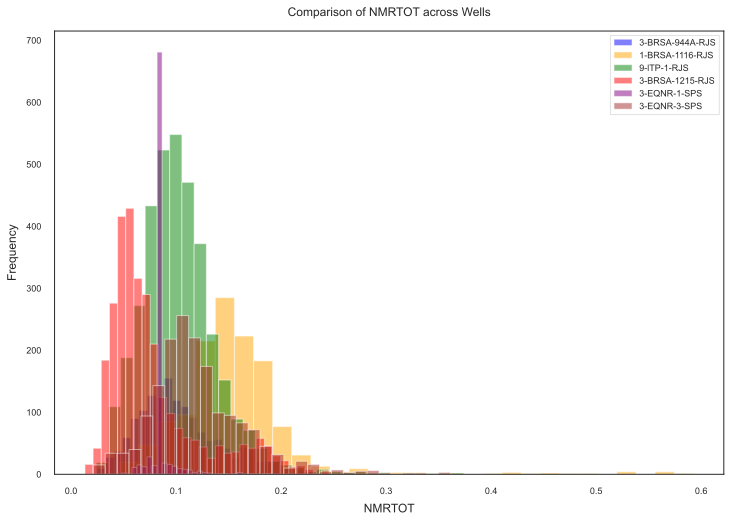

In [28]:
import matplotlib.pyplot as plt

# List of DataFrames and corresponding well names
dfs = [df_944_ML, df_1116_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]
well_names = ['3-BRSA-944A-RJS', '1-BRSA-1116-RJS', '9-lTP-1-RJS', '3-BRSA-1215-RJS', '3-EQNR-1-SPS', '3-EQNR-3-SPS']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Define distinct colors for each well

# Plot histograms for the 'GR' column of each DataFrame with custom well names and colors
plt.figure(figsize=(12, 8))
for i, df in enumerate(dfs):
    df['NMRTOT'].hist(alpha=0.5, bins=30, label=well_names[i], color=colors[i])

plt.title('Comparison of NMRTOT across Wells')
plt.xlabel('NMRTOT')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

#######################

# Specify the folder where you want to save the image
output_folder = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Histograms + Seaborns'

# Ensure the folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Save the plot as a PNG file
output_filename = os.path.join(output_folder, 'Histogram-Comparison-NMRTOT.png')  # Name of the output file
plt.savefig(output_filename)

plt.show()  # Show the plot if needed

<span style='color:gray'> <span style="font-size:25px;"> 
**===============================================================================**

In [29]:
df_Fin = pd.concat([df_944_ML, df_9_ITP_ML, df_1215_ML, df_3_EQNR_1_ML, df_3_EQNR_3_ML]).sort_values(by='DEPTH')

df_Fin = df_Fin.drop_duplicates(subset='DEPTH')
df_Fin.reset_index(drop=True, inplace=True)
df_Fin # Print the combined dataframe

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5230.899893,18.364668,19.196234,20.528210,22.001585,2.112285,0.277651,68.337450,8.430419,0.146941,0.206191,0.279142
1,5230.999893,18.145609,17.247047,17.625770,18.691048,2.125317,0.281514,67.993440,8.418438,0.142935,0.207419,0.269785
2,5231.099893,17.943176,15.329754,15.300582,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
3,5231.199893,18.042002,11.579553,11.556740,11.997000,2.124417,0.312481,67.298560,8.239479,0.131576,0.215271,0.257083
4,5231.299893,18.240273,10.135851,10.116982,10.471834,2.124772,0.306717,66.678116,8.161089,0.124349,0.220581,0.251031
...,...,...,...,...,...,...,...,...,...,...,...,...
10421,6314.694000,51.415714,2.653257,2.131811,1.854116,2.507010,0.141281,64.556470,4.203460,0.094473,0.130534,0.151384
10422,6314.846700,55.503613,3.084166,2.306518,1.995265,2.487556,0.148064,63.817300,3.959332,0.084641,0.120594,0.134910
10423,6314.999000,55.075043,3.702130,2.748514,2.388380,2.476734,0.147399,63.830630,3.758424,0.075792,0.114405,0.117376
10424,6315.151400,52.195040,4.674475,3.237480,2.880047,2.480292,0.148540,63.218487,3.776830,0.075792,0.114405,0.117376


Convert the DataFrame into a CSV file (CSV file is required for ML Algorithms implementation)

In [30]:
destination_file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_Fin.csv'

df_Fin.to_csv(destination_file_path, index=None)

print(f"DataFrame saved as CSV file at: {destination_file_path}")

DataFrame saved as CSV file at: /Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_Fin.csv
